In [5]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests as req
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [6]:
# create url + key variable 
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key

In [7]:
# create latitudes and longitudes in arrays declared as variables, zip the lats and longs together in a new variable
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(latitudes, longitudes)
lat_lngs

In [8]:
# unpack lat_lngs into a list
coordinates = list(lat_lngs)


In [9]:
# Create a list for holding the cities
cities = []
# identify the nearest city for each latitude and longitude
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # add the city to cities if its not there already
    if city not in cities:
        cities.append(city)
# print count to confirm a sufficient count
len(cities)
    


600

In [10]:
# Create Empty List
city_data = []
# print the beginning of the logging
print('Beginning Data Retrieval    ')
print('-----------------------------')
# create counters
record_count = 1
set_count = 1
# iterate through the cities list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # create a url endpoint for each city
    city_url = url + '&q=' + city.replace(' ', '+')
    # log the url, record, set numbers, and city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
     # Add one to the record count
    record_count +=1
    try:
        # parse json and retrieve the data
        weather_data = req.get(city_url).json()
        # parse out desired data
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        # convert the date to ISO standard and format it
        city_date = datetime.utcfromtimestamp(weather_data['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append city inforation to city_data list
        city_data.append({'City': city.title(), 'Lat':city_lat, 'Lng':city_lng, 'Max Temp': city_max_temp, 'Humidity':city_humidity, 'Cloudiness':city_clouds, 'Wind Speed':city_wind, 'Country':city_country, 'Date':city_date})
    # if error is experienced
    except: 
        print('City not found Skipping....')
        pass
#indicate that data loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')
        
        

Beginning Data Retrieval    
-----------------------------
Processing Record 1 of set 1 | ushuaia
Processing Record 2 of set 1 | zenzeli
Processing Record 3 of set 1 | marrakesh
Processing Record 4 of set 1 | pierre
Processing Record 5 of set 1 | rikitea
Processing Record 6 of set 1 | sao joao da barra
Processing Record 7 of set 1 | norman wells
Processing Record 8 of set 1 | kambove
Processing Record 9 of set 1 | praia
Processing Record 10 of set 1 | luderitz
Processing Record 11 of set 1 | qaqortoq
Processing Record 12 of set 1 | vikhorevka
Processing Record 13 of set 1 | road town
Processing Record 14 of set 1 | palabuhanratu
City not found Skipping....
Processing Record 15 of set 1 | bluff
Processing Record 16 of set 1 | vaini
Processing Record 17 of set 1 | vallenar
Processing Record 18 of set 1 | ambon
Processing Record 19 of set 1 | grand gaube
Processing Record 20 of set 1 | mataura
Processing Record 21 of set 1 | campbell river
Processing Record 22 of set 1 | port lincoln
Proc

Processing Record 40 of set 4 | basco
Processing Record 41 of set 4 | dikson
Processing Record 42 of set 4 | jumla
Processing Record 43 of set 4 | mys shmidta
City not found Skipping....
Processing Record 44 of set 4 | brae
Processing Record 45 of set 4 | tiksi
Processing Record 46 of set 4 | beihai
Processing Record 47 of set 4 | tchibanga
Processing Record 48 of set 4 | opuwo
Processing Record 49 of set 4 | mustasaari
Processing Record 50 of set 4 | sao filipe
Processing Record 1 of set 5 | vila do maio
Processing Record 2 of set 5 | rockingham
Processing Record 3 of set 5 | kiama
Processing Record 4 of set 5 | winneba
Processing Record 5 of set 5 | vangaindrano
Processing Record 6 of set 5 | wynyard
Processing Record 7 of set 5 | iqaluit
Processing Record 8 of set 5 | hofn
Processing Record 9 of set 5 | general pico
Processing Record 10 of set 5 | lithgow
Processing Record 11 of set 5 | abonnema
Processing Record 12 of set 5 | porto novo
Processing Record 13 of set 5 | sault sainte 

Processing Record 27 of set 8 | bonavista
Processing Record 28 of set 8 | mabaruma
Processing Record 29 of set 8 | kenai
Processing Record 30 of set 8 | sakakah
Processing Record 31 of set 8 | along
Processing Record 32 of set 8 | henties bay
Processing Record 33 of set 8 | kijang
Processing Record 34 of set 8 | morant bay
Processing Record 35 of set 8 | walvis bay
Processing Record 36 of set 8 | leningradskiy
Processing Record 37 of set 8 | saint-pierre
Processing Record 38 of set 8 | maceio
Processing Record 39 of set 8 | buala
Processing Record 40 of set 8 | mackay
Processing Record 41 of set 8 | itarema
Processing Record 42 of set 8 | lasa
Processing Record 43 of set 8 | wajir
Processing Record 44 of set 8 | berndorf
Processing Record 45 of set 8 | talnakh
Processing Record 46 of set 8 | leeton
Processing Record 47 of set 8 | muros
Processing Record 48 of set 8 | yunjinghong
City not found Skipping....
Processing Record 49 of set 8 | nguiu
City not found Skipping....
Processing Rec

Processing Record 14 of set 12 | severobaykalsk
Processing Record 15 of set 12 | izazi
Processing Record 16 of set 12 | douentza
Processing Record 17 of set 12 | nemuro
Processing Record 18 of set 12 | san luis
Processing Record 19 of set 12 | komsomolskiy
Processing Record 20 of set 12 | jardim de piranhas
Processing Record 21 of set 12 | jieshi
Processing Record 22 of set 12 | otjiwarongo
Processing Record 23 of set 12 | kalemie
Processing Record 24 of set 12 | raymond
Processing Record 25 of set 12 | nago
Processing Record 26 of set 12 | muswellbrook
Processing Record 27 of set 12 | hibbing
Processing Record 28 of set 12 | salisbury
Processing Record 29 of set 12 | hami
Processing Record 30 of set 12 | porosozero
Processing Record 31 of set 12 | batagay-alyta
Processing Record 32 of set 12 | urusha
Processing Record 33 of set 12 | pavlysh
Processing Record 34 of set 12 | cabo san lucas
Processing Record 35 of set 12 | borogontsy
Processing Record 36 of set 12 | hirara
Processing Rec

In [11]:
# check the length of city_data
len(city_data)

553

In [12]:
# convert array to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.66,71,75,19.57,AR,2022-01-27 16:31:04
1,Zenzeli,45.9241,47.0474,29.82,93,100,5.99,RU,2022-01-27 16:31:04
2,Marrakesh,31.6315,-8.0083,66.27,37,75,5.75,MA,2022-01-27 16:31:05
3,Pierre,44.3683,-100.3510,34.86,76,100,7.00,US,2022-01-27 16:31:05
4,Rikitea,-23.1203,-134.9692,78.08,77,27,19.24,PF,2022-01-27 16:31:05
5,Sao Joao Da Barra,-21.6403,-41.0511,91.49,74,2,14.05,BR,2022-01-27 16:31:06
6,Norman Wells,65.2820,-126.8329,-2.16,84,75,3.44,CA,2022-01-27 16:31:06
7,Kambove,-10.8764,26.5969,63.79,95,96,4.52,CD,2022-01-27 16:31:07
8,Praia,14.9215,-23.5087,75.74,60,75,25.32,CV,2022-01-27 16:31:07
9,Luderitz,-26.6481,15.1594,72.64,62,0,28.95,NA,2022-01-27 16:31:08


In [13]:
# create proper column order list and reorder city_data_df columns with it
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-01-27 16:31:04,-54.8000,-68.3000,49.66,71,75,19.57
1,Zenzeli,RU,2022-01-27 16:31:04,45.9241,47.0474,29.82,93,100,5.99
2,Marrakesh,MA,2022-01-27 16:31:05,31.6315,-8.0083,66.27,37,75,5.75
3,Pierre,US,2022-01-27 16:31:05,44.3683,-100.3510,34.86,76,100,7.00
4,Rikitea,PF,2022-01-27 16:31:05,-23.1203,-134.9692,78.08,77,27,19.24
5,Sao Joao Da Barra,BR,2022-01-27 16:31:06,-21.6403,-41.0511,91.49,74,2,14.05
6,Norman Wells,CA,2022-01-27 16:31:06,65.2820,-126.8329,-2.16,84,75,3.44
7,Kambove,CD,2022-01-27 16:31:07,-10.8764,26.5969,63.79,95,96,4.52
8,Praia,CV,2022-01-27 16:31:07,14.9215,-23.5087,75.74,60,75,25.32
9,Luderitz,NA,2022-01-27 16:31:08,-26.6481,15.1594,72.64,62,0,28.95


In [14]:
# Create output file
output_path = 'weather_data/cities.csv'
# save dataframe to output csv
city_data_df.to_csv(output_path, index_label='City_ID')

In [15]:
# Extract Relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

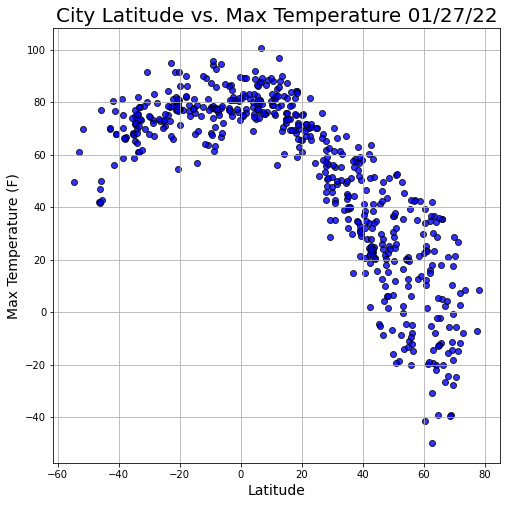

In [16]:
# build the scatter plot for lat v max temp
plt.figure(figsize=(8,8))
plt.scatter(lats, max_temps, edgecolor='k', facecolor='blue', marker='o', alpha=0.8, linewidths=1, label='Cities')
plt.title('City Latitude vs. Max Temperature ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig1.png')




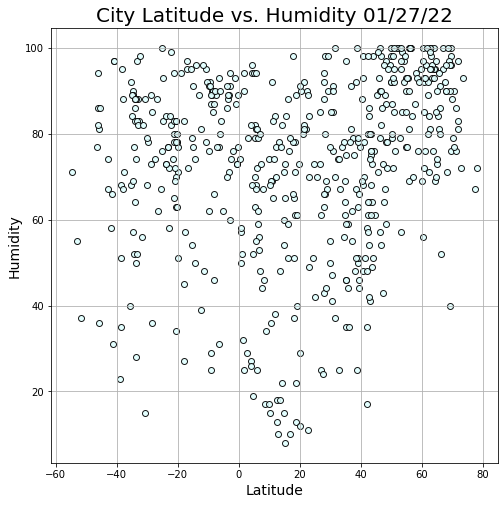

In [17]:
# build the scatter plot for lat v humidity
plt.figure(figsize=(8,8))
plt.scatter(lats, humidity, edgecolor='k', facecolor='lightcyan', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig2.png')


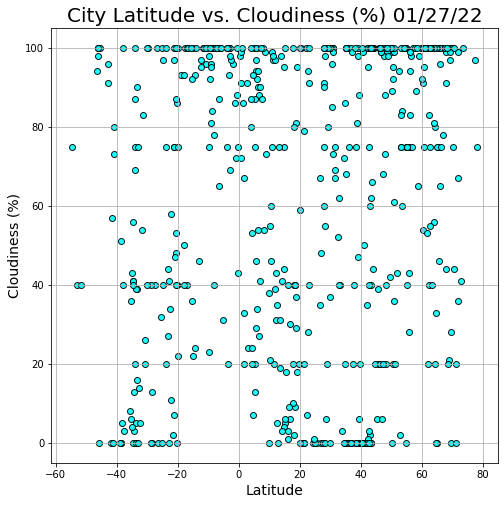

In [18]:
# build the scatter plot for lat v cloudiness
plt.figure(figsize=(8,8))
plt.scatter(lats, cloudiness, edgecolor='k', facecolor='aqua', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig3.png')

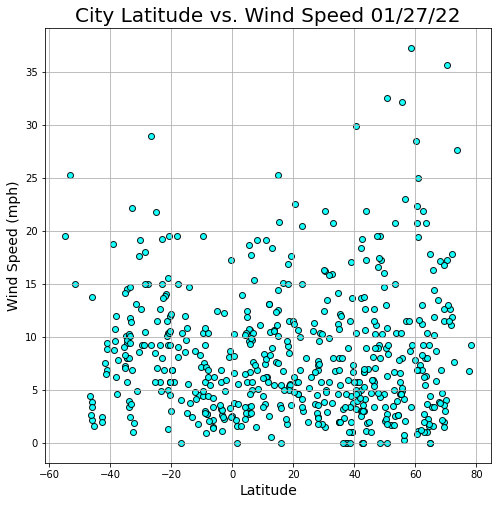

In [19]:
# build the scatter plot for lat v wind speed
plt.figure(figsize=(8,8))
plt.scatter(lats, wind_speed, edgecolor='k', facecolor='aqua', marker='o', alpha=0.9, linewidths=1, label='Cities')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'), fontsize=20)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig('weather_data/Fig4.png')

In [20]:
# create linregress function that performs the regression, plots it, and plots the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # calculate the regression values
    regress_values = x_values * slope + intercept
    # get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    #Create the scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    #Annotate the text for the line equation and add figure labels
    plt.annotate(line_eq, text_coordinates, color='red', fontsize=15 )
    plt.title(title, fontsize=14)
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.show()


In [21]:
# loc practice
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-01-27 16:31:09
Lat                         -46.6
Lng                      168.3333
Max Temp                    41.81
Humidity                       77
Cloudiness                     94
Wind Speed                   4.43
Name: 13, dtype: object

In [22]:
# create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]


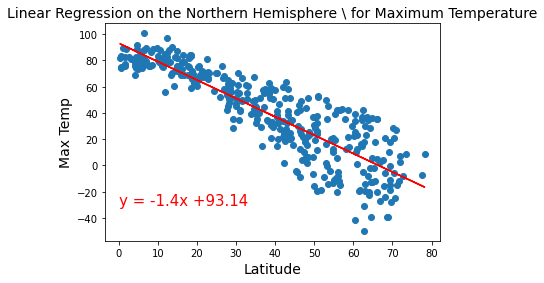

In [23]:
# northern hemisphere linear regression for max temperature
n_x_values = northern_hemi_df['Lat']
n_y_values = northern_hemi_df['Max Temp']
plot_linear_regression(n_x_values, n_y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (0, -30))

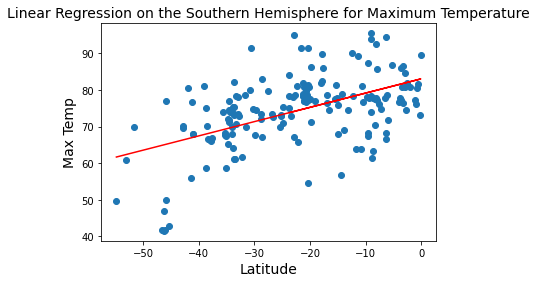

In [24]:
#Southern Hemisphere Regression
s_x_values = southern_hemi_df['Lat']
s_y_values = southern_hemi_df['Max Temp']
plot_linear_regression(s_x_values, s_y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-55,100 ))

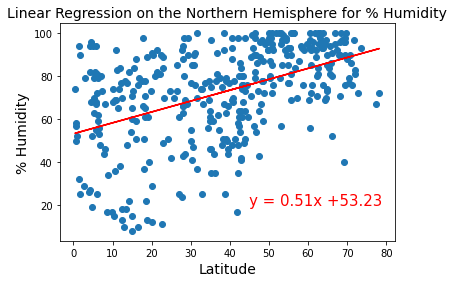

In [25]:
#Northern Hemisphere % Humidity linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (45,20))

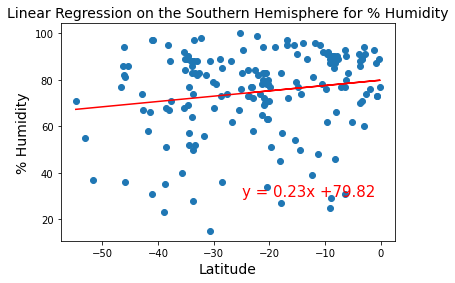

In [26]:
#southern Hemisphere % Humidity linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-25,30))

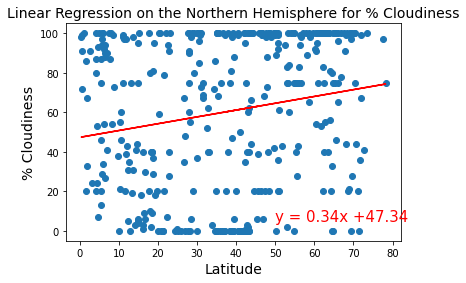

In [27]:
#Northern Hemisphere % Humidity linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (50,5))

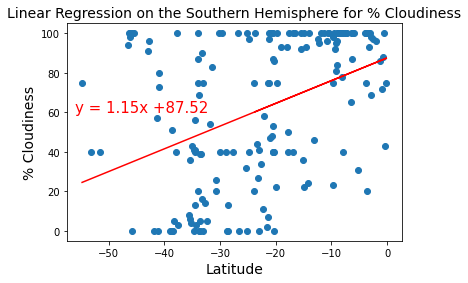

In [28]:
#southern Hemisphere % Humidity linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-56,60))

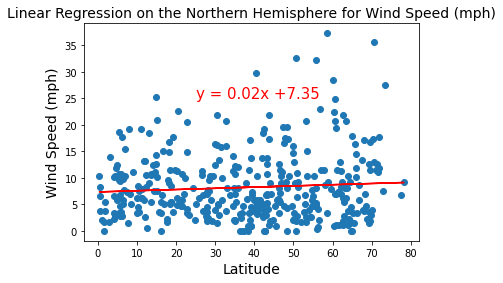

In [29]:
#Northern Hemisphere % Humidity linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)', (25,25))

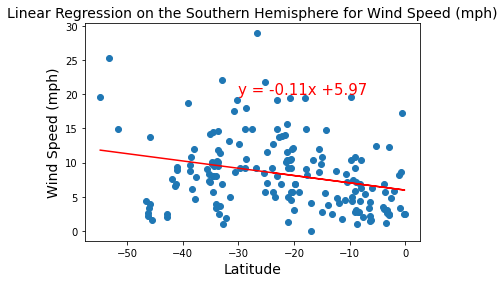

In [31]:
#Southern Hemisphere % Humidity linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 'Wind Speed (mph)', (-30,20))